In [26]:
#####JAN - MAY 2017: LINKS
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

###load all the datasets
##meta_data file
all_df = pd.read_csv('/Users/eshwarchandrasekharan/Downloads/jan_may_2017_links')
all_df = all_df.fillna(0)

In [27]:
all_df.columns

Index(['buzz_external_id', 'buzz_post_parent_external_id',
       'buzz_post_created_at', 'buzz_account_display_name',
       'buzz_post_type_name', 'buzz_post_buzz_id', 'buzz_campaign_uri',
       'buzz_campaign_name', 'ext_table1_stats_date', 'ext_external_id',
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan', 'ext_table1_firsthour_stats_date',
       'ext_twodays_consumptions_by_type__link_clicks',
       'ext_twodays_stories_by_action_type__share', 'ext_twodays_stats_date'],
      dtype='object')

Without cross-promotion features
Testing for shares!
(46158, 10) (46158,)
(11540, 10) (11540,)


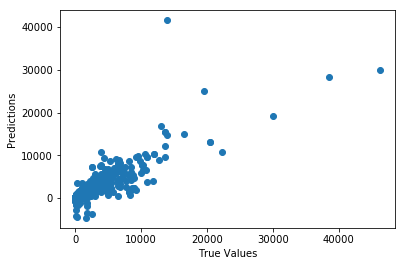

Predict  share
Trial run - Score: 0.782483742185
Cross-validated scores: [ 0.73642017  0.83433102  0.63369094  0.8039965   0.79510588  0.82921337
 -0.55669539  0.84942611  0.79261192  0.85769755]
Mean accuracy =  0.657579806422
Cross-Predicted Accuracy (R2): 0.672643592435
Mean Absolute Error:  129.835452606
Testing for clicks!
(46158, 10) (46158,)
(11540, 10) (11540,)


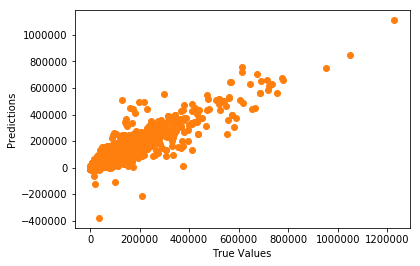

Predict  clicks
Trial run - Score: 0.882932418664
Cross-validated scores: [ 0.88322017  0.90067966  0.88098253  0.8959441   0.92110864  0.90273389
  0.30223907  0.91486469  0.89796318  0.91313833]
Mean accuracy =  0.841287426864
Cross-Predicted Accuracy (R2): 0.844546482045
Mean Absolute Error:  8071.29353953
                                               0          0
0   ext_table1_consumptions_by_type__link_clicks   3.015264
1  ext_table1_consumptions_by_type__other_clicks  -0.390638
2                ext_table1_reactions_like_total   5.843742
3     ext_table1_stories_by_action_type__comment  10.959402
4        ext_table1_stories_by_action_type__like  -2.942473
5       ext_table1_stories_by_action_type__share  44.883092
6                         ext_table1_engaged_fan   0.931498
7                           ext_table1_fan_reach   0.688562
8                         ext_table1_impressions  -0.303188
9                     ext_table1_impressions_fan  -0.183651


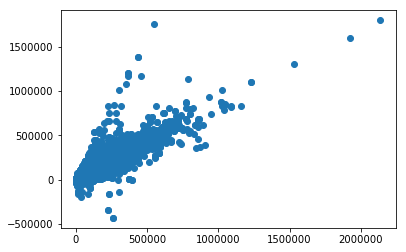

In [28]:
###PREDICTION: Cross-validation
train = all_df

print("Without cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]
# alt_inf = len(all_pages) + 1
# train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [29]:
all_df['buzz_external_id'].shape, all_df['buzz_external_id'].unique().shape

((57698,), (37231,))

In [32]:
#####REGRESSION: without cross-promotion

train = all_df

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]

####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###overall clicks
res = ols(y = train['ext_twodays_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['ext_twodays_stories_by_action_type__share'], x = train[features])
print(res)

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ext_table1_consumptions_by_type__link_clicks>
             + <ext_table1_consumptions_by_type__other_clicks> + <ext_table1_reactions_like_total>
             + <ext_table1_stories_by_action_type__comment>
             + <ext_table1_stories_by_action_type__like> + <ext_table1_stories_by_action_type__share>
             + <ext_table1_engaged_fan> + <ext_table1_fan_reach>
             + <ext_table1_impressions> + <ext_table1_impressions_fan> + <intercept>

Number of Observations:         57698
Number of Degrees of Freedom:   11

R-squared:         0.8801
Adj R-squared:     0.8800

Rmse:          22820.3850

F-stat (10, 57687): 42329.5822, p-value:     0.0000

Degrees of Freedom: model 10, resid 57687

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
---------------------------------

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
###delete dups
train.columns

Index(['buzz_external_id', 'buzz_post_parent_external_id',
       'buzz_post_created_at', 'buzz_account_display_name',
       'buzz_post_type_name', 'buzz_post_buzz_id', 'buzz_campaign_uri',
       'buzz_campaign_name', 'ext_table1_stats_date', 'ext_external_id',
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan', 'ext_table1_firsthour_stats_date',
       'ext_twodays_consumptions_by_type__link_clicks',
       'ext_twodays_stories_by_action_type__share', 'ext_twodays_stats_date'],
      dtype='object')

In [39]:
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

,buzz_external_id,buzz_post_parent_external_id,buzz_post_created_at,buzz_account_display_name,buzz_post_type_name,buzz_post_buzz_id,buzz_campaign_uri,buzz_campaign_name,ext_table1_stats_date,ext_external_id,...,ext_table1_stories_by_action_type__like,ext_table1_stories_by_action_type__share,ext_table1_engaged_fan,ext_table1_fan_reach,ext_table1_impressions,ext_table1_impressions_fan,ext_table1_firsthour_stats_date,ext_twodays_consumptions_by_type__link_clicks,ext_twodays_stories_by_action_type__share,ext_twodays_stats_date
